# <center><b> <em> Exploratory Data Analysis </em> </b></center>

## <font color="green"> | - Import des Biblio et Dataframe</font>

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [159]:
# Définir une fonction de conversion pour la colonne datetime
def parse_datetime(date_string):
    return pd.to_datetime(date_string)

# Spécifier les types de données et les convertisseurs
dtype = {'invoice': str, 'object': int, 'stock_code': object, 'description': object, 'quantity': int, 'unit_price': float, 'customer_id': object, 'country': object}
converters = {'invoice_date': parse_datetime}

# Charger le fichier CSV en utilisant les types de données et les convertisseurs
data = pd.read_csv("../data/silver.csv", dtype=dtype, converters=converters)

In [160]:
data.shape

(1033036, 8)

In [161]:
data.head()

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [188]:
df_churn_custmer = pd.read_csv("../data/df_churn_custmer.csv")

## <font color="green"> || - Numerical Variable Analysis : </font>

In [166]:
data.describe()

,quantity,unit_price
count,1.033036e+06,1.033036e+06
mean,1.007688e+01,4.613980e+00
std,1.751976e+02,1.223975e+02
min,-8.099500e+04,-5.359436e+04
25%,1.000000e+00,1.250000e+00
50%,3.000000e+00,2.100000e+00
75%,1.000000e+01,4.150000e+00
max,8.099500e+04,3.897000e+04


In [167]:
desc_prcnt = df_churn_custmer.sort_values(by="refund_amount", ascending=True)


In [168]:
desc_prcnt.head()

,customer_id,payed_amount,refund_amount,pourcentage
4070,16446.0,168472.50,-168469.60,99.998279
0,12346.0,77353.96,-77287.10,99.913566
3378,15749.0,44534.30,-22998.40,51.641993
584,12931.0,92347.34,-20800.37,22.524060
3654,16029.0,117763.62,-20696.91,17.574961


/tmp/ipykernel_51440/3052568354.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



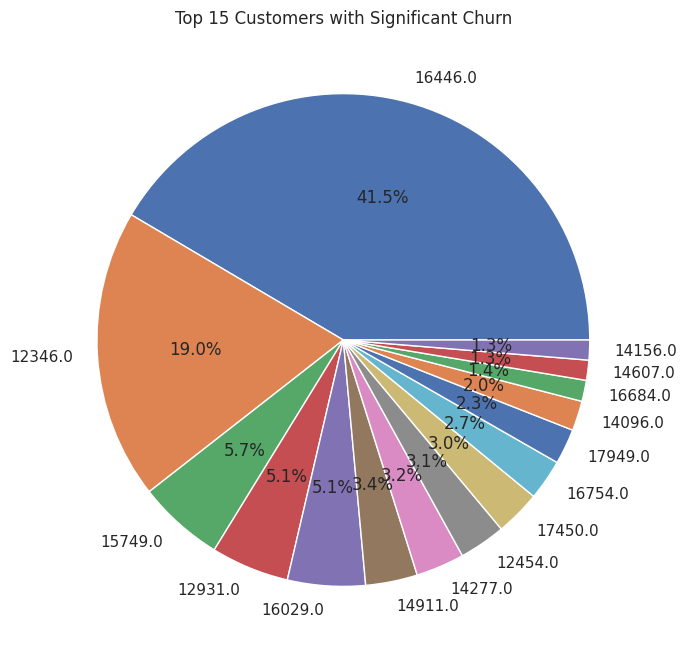

In [189]:
# Sélectionner les clients avec un churn significatif (valeur absolue)
significant_churn = desc_prcnt[desc_prcnt['refund_amount'] < 0]

# Calculer le total des remboursements
total_refunds = significant_churn['refund_amount'].abs().sum()

# Calculer le pourcentage de remboursement pour chaque client
significant_churn['refund_percentage'] = (significant_churn['refund_amount'].abs() / total_refunds) * 100

# Trier les clients par ordre décroissant de pourcentage de remboursement
significant_churn = significant_churn.sort_values('refund_percentage', ascending=False)

# Limiter le nombre de clients affichés dans le graphe
top_n = 15
significant_churn = significant_churn.head(top_n)

# Créer le pie chart
plt.figure(figsize=(8, 8))
plt.pie(significant_churn['refund_percentage'], labels=significant_churn['customer_id'], autopct='%1.1f%%')
plt.title('Top {} Customers with Significant Churn'.format(top_n))
plt.show()

### <font color="green"> ||| - Categorical Variable Analysis : </font>

In [171]:
descr_quant = data.groupby("description").agg({"quantity": "sum"}).sort_values("quantity", ascending=False)

In [172]:
descr_quant.head()

,quantity
description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,104546
WHITE HANGING HEART T-LIGHT HOLDER,91026
ASSORTED COLOUR BIRD ORNAMENT,79579
JUMBO BAG RED RETROSPOT,76514
BROCADE RING PURSE,69639


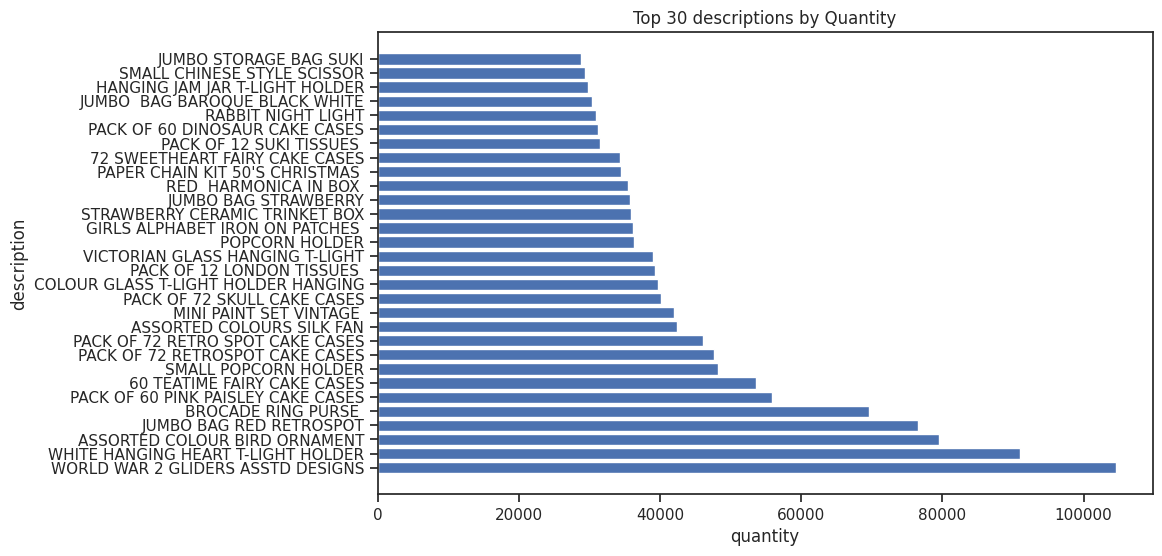

In [173]:
top_n = 30  # Adjust the number of bars to show

top_descriptions = descr_quant.head(top_n)
plt.figure(figsize=(10, 6))
plt.barh(top_descriptions.index, top_descriptions['quantity'])
plt.xlabel('quantity')
plt.ylabel('description')
plt.title('Top {} descriptions by Quantity'.format(top_n))
plt.show()

In [174]:
country_cust_data=data[['country','customer_id']].drop_duplicates()
country_cust_data.groupby(['country'])['customer_id'].aggregate('count').reset_index().sort_values('customer_id', ascending=False)

,country,customer_id
40,United Kingdom,5410
15,Germany,107
14,France,95
34,Spain,41
3,Belgium,29
30,Portugal,24
26,Netherlands,23
36,Switzerland,22
35,Sweden,19
20,Italy,17


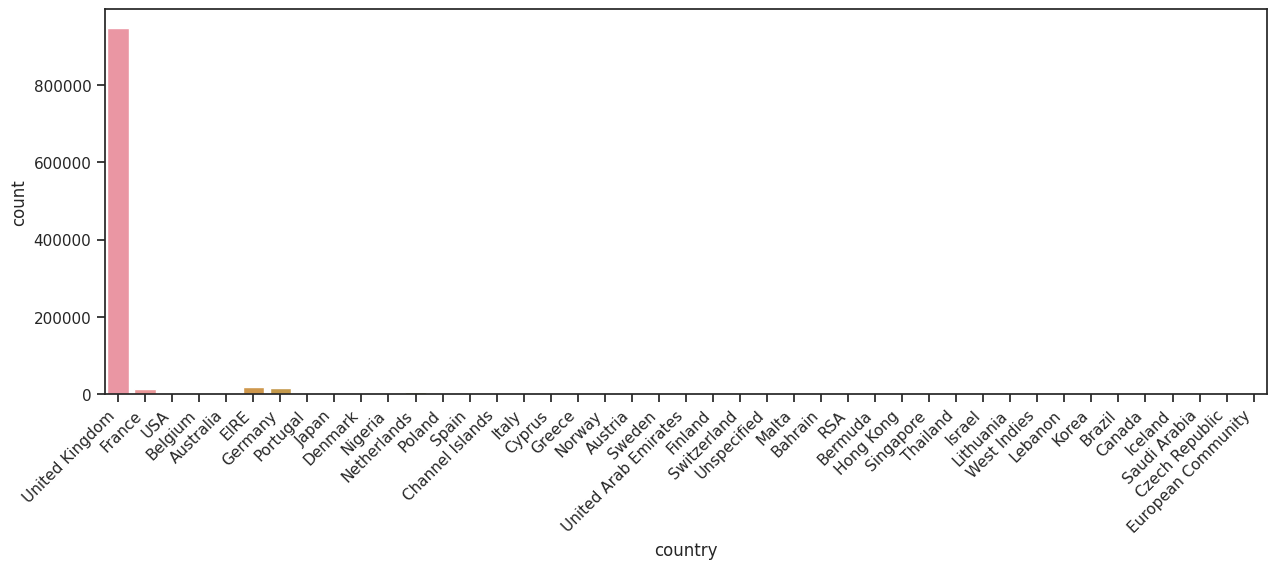

In [175]:
def cat_summary(dataframe, col_name, plot=False):
    if plot:
        fig_dims = (15, 5)
        fig, ax = plt.subplots(figsize=fig_dims)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.xticks(rotation = 45, ha = 'right')
        plt.show()

cat_summary(data, "country", plot=True)

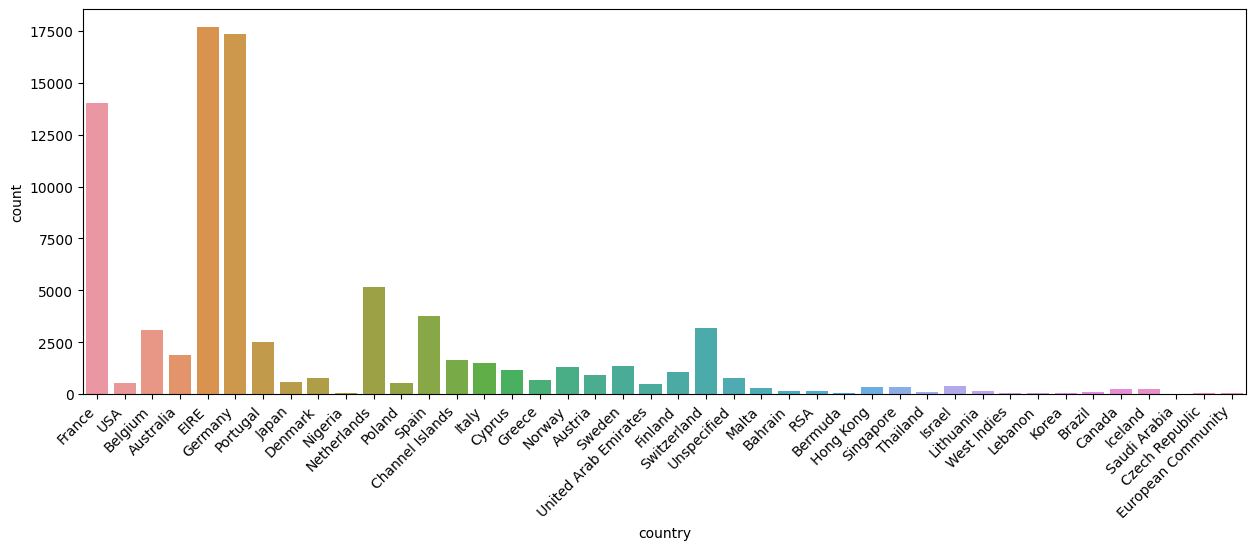

In [176]:
def cat_summary(dataframe, col_name, plot=False):
    if plot:
        fig_dims = (15, 5)
        fig, ax = plt.subplots(figsize=fig_dims)
        filtered_data = dataframe[dataframe[col_name] != 'United Kingdom']
        sns.countplot(x=col_name, data=filtered_data)
        plt.xticks(rotation=45, ha='right')
        plt.show()

cat_summary(data, "country", plot=True)

In [187]:
import plotly.graph_objects as go

country_colors = {
    'United Kingdom': 'salmon', 'Iceland': 'blue', 'Finland': 'green', 'Italy': 'purple',
    'Norway': 'orange', 'Unspecified': 'gray', 'Bahrain': 'cyan', 'Spain': 'magenta', 'Portugal': 'lime',
    'Switzerland': 'yellow', 'Austria': 'brown', 'Cyprus': 'olive', 'Belgium': 'red',
    'Denmark': 'teal','Netherlands': 'gold','Australia': 'navy',
    'RSA': 'orchid','France': 'tomato','Germany': 'skyblue','USA': 'silver',
    'Thailand': 'peru','Greece': 'indigo','Sweden': 'violet',
    'Israel': 'pink','Saudi Arabia': 'darkgreen','Poland': 'lightcoral',
    'United Arab Emirates': 'steelblue', 'Singapore': 'sienna', 'EIRE': 'crimson',
    'Brazil': 'maroon', 'Japan': 'chartreuse', 'Lebanon': 'slategray',
    'Korea': 'sandybrown', 'Czech Republic': 'lavender', 'Channel Islands': 'lightpink',
    'European Community': 'mediumaquamarine', 'Lithuania': 'lightseagreen', 'Canada': 'mediumorchid',
    'Malta': 'hotpink', 'Nigeria': 'darkorchid', 'West Indies': 'mediumslateblue'
}

mixed_data['color'] = mixed_data['country'].map(country_colors)

# Create a 3D scatter plot with the numeric variables and country colors
fig = go.Figure(data=[go.Scatter3d(
    x=mixed_data['recency'],
    y=mixed_data['frequency'],
    z=mixed_data['monetary'],
    mode='markers',
    marker=dict(
        color=mixed_data['color'],
        size=5
    )
)])

# Set the axes titles and plot title
fig.update_layout(
    scene=dict(
        xaxis_title='Recency',
        yaxis_title='Frequency',
        zaxis_title='Monetary'
    ),
    title='3D Scatter Plot',
    width=1000,  # Adjust the width of the figure
    height=800  # Adjust the height of the figure
)

# Create a custom legend
legend_labels = list(country_colors.keys())
legend_trace = [go.Scatter3d(
    x=[None],
    y=[None],
    z=[None],
    mode='markers',
    marker=dict(
        color=[country_colors[label] for label in legend_labels],
        size=5
    ),
    showlegend=True,
    name='Countries'
)]
fig.add_trace(legend_trace[0])
fig.show()


##### <font color="yellow"> Remarques :  </font>